<a href="https://colab.research.google.com/github/Brian-2000/Malaria-TensorFlow-Model/blob/main/Malaria_Model_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 - OpenCV (Open Source Computer Vision Library) is used it to preprocess images and turn them to greyscale in the form of a NumPy array (numerical format) and resize it to a (70x70) shape.
 - I imported all the libraries required to classify the malaria dataset.
 - I loaded the data from from my google drive where I stored the dataset using the from google.colab import drive & drive.mount('/content/drive')

In [1]:
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   In the cell below, I loaded data from my google drive path
*   Resized the image to 70 * 70
*   The glob module is used to get all images in that format (ending with .png in the specified folder).

*    I then Iterate through the image file names and load each image in grayscale, resize it and append it to the numpy array, I also do the same for labels (0 for uninfected and 1 for parasitized).


In [2]:
# The path to the directory containing the Malaria image dataset
image_path="/content/drive/MyDrive/cell_images/"
image_size=70

def load_img_data(path):
     # image_files: Utilizes glob.glob to get a list of file paths for all the
     # PNG images in the specified directory and its subdirectories.
     # This includes both infected and uninfected cell images.
    image_files = glob.glob(os.path.join(path, "Parasitized/*.png")) + \
                  glob.glob(os.path.join(path, "Uninfected/*.png"))
    X, y = [], []

    # Iterate through each image file
    for image_file in image_files:
        # Determine the label for each image based on whether the file path
        # contains "Uninfected" (label 0) or not (label 1)
        label = 0 if "Uninfected" in image_file else 1
        # load the image in gray scale
        image_array = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        # resize the image to (70x70)
        image_resized = cv2.resize(image_array, (image_size, image_size))
        X.append(image_resized)
        y.append(label)
    return X, y

In [4]:
# oad and preprocess the image data. This function returns the preprocessed
# image data (X) and corresponding labels (y).
X, y = load_img_data(image_path)

# Reshape the image data (X) to have the shape (n_samples, 70, 70, 1)
# to fit the input shape expected by the neural network
X = np.array(X).reshape(-1, image_size, image_size, 1)
# scale pixels from the range [0, 255] to [0, 1]
# to help the neural network learn much faster
X = X / 255

# split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
print("Total training samples:", X_train.shape)
print("Total validation samples:", X_test.shape[0])

Total training samples: (13670, 70, 70, 1)
Total validation samples: 1519


In [ ]:
# Creates a sequential model, allowing layers to be added sequentially
model = Sequential()

# Adds a 2D convolutional layer with 64 filters, each with a 3x3 kernel size
model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))

# ReLU activation function to introduce non-linearity.
model.add(Activation("relu"))

# Add a max-pooling layer with a 2x2 pooling window to downsample the feature maps.
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the output of the last convolutional layer to a 1D array, preparing it for input to the fully connected layers
model.add(Flatten())

# Adds a fully connected layer with 64 neurons
model.add(Dense(64))

# Apply ReLU activation to the output of the fully connected layer.
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

# Add a fully connected layer with a single neuron, representing the output class (binary classification)
model.add(Dense(1))

# Apply the sigmoid activation function to squash the output between 0 and 1, representing the probability of the positive class.
model.add(Activation("sigmoid"))

# Compile the model with binary cross-entropy loss, Adam optimizer, and accuracy as the evaluation metric
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# train the model on the training data (X_train and y_train) with a batch size of 64, 10 epochs, and 20% validation split
model.fit(X_train, np.array(y_train), batch_size=64, epochs=10, validation_split=0.2)
# with the line of code below, you can only load the previously trained model
# model.load_weights("malaria-cell-cnn.h5")

Epoch 1/10
171/171 [==============================] - 151s 871ms/step - loss: 0.5288 - accuracy: 0.7740 - val_loss: 0.5081 - val_accuracy: 0.7794
Epoch 2/10
171/171 [==============================] - 154s 902ms/step - loss: 0.3597 - accuracy: 0.8375 - val_loss: 0.1560 - val_accuracy: 0.9415
Epoch 3/10
171/171 [==============================] - 158s 921ms/step - loss: 0.1425 - accuracy: 0.9431 - val_loss: 0.1154 - val_accuracy: 0.9568
Epoch 4/10
106/171 [=================>............] - ETA: 59s - loss: 0.1230 - accuracy: 0.9515 

In [6]:
# Evaluate the model on the test dataset (X_test and y_test).
#The verbose=0 argument suppresses the progress bar during evaluation.
loss, accuracy = model.evaluate(X_test, np.array(y_test), verbose=0)

# Print out the number of images in the test dataset and the evaluation results.
print(f"Testing on {len(X_test)} images, the results are\n Accuracy: {accuracy} | Loss: {loss}")

Testing on 1519 images, the results are
 Accuracy: 0.9486504197120667 | Loss: 0.15284588932991028


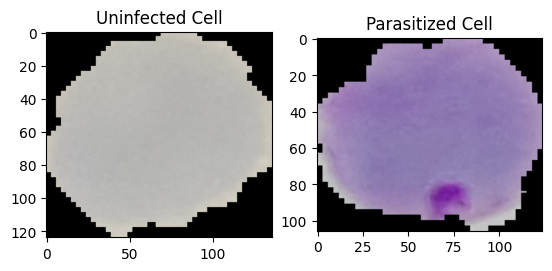

In [7]:
# store the file paths of the two images to be tested. These images are located in the Google Drive directory specified
uninfected_cell = "/content/drive/MyDrive/cell_images/Uninfected/C168P129ThinF_IMG_20151118_160516_cell_161.png"
infected_cell = "/content/drive/MyDrive/cell_images/Parasitized/C189P150ThinF_IMG_20151203_142224_cell_97.png"

_, ax = plt.subplots(1, 2)
ax[0].imshow(plt.imread(uninfected_cell))
ax[0].title.set_text("Uninfected Cell")
ax[1].imshow(plt.imread(infected_cell))
ax[1].title.set_text("Parasitized Cell")

# Display the plot with both images
plt.show()

In [8]:
# Read the uninfected cell image in grayscale using OpenCV.
img_arr_uninfected = cv2.imread(uninfected_cell, cv2.IMREAD_GRAYSCALE)

# Read the infected cell image in grayscale using OpenCV.
img_arr_infected = cv2.imread(infected_cell, cv2.IMREAD_GRAYSCALE)

# Resize the uninfected cell image to a square shape with dimensions
img_arr_uninfected = cv2.resize(img_arr_uninfected, (image_size, image_size))

# Resize the infected cell image to a square shape with dimensions
img_arr_infected = cv2.resize(img_arr_infected, (image_size, image_size))

# Scale the pixel values of the infected cell image to the range [0, 1].
img_arr_infected = img_arr_infected / 255

# Scale the pixel values of the uninfected cell image to the range [0, 1].
img_arr_uninfected = img_arr_uninfected / 255

#  Reshape the infected cell image array to have a batch dimension of 1 and
# match the expected input shape of the neural network.
img_arr_infected = img_arr_infected.reshape(1, *img_arr_infected.shape)
img_arr_infected = np.expand_dims(img_arr_infected, axis=3)
img_arr_uninfected = img_arr_uninfected.reshape(1, *img_arr_uninfected.shape)
img_arr_uninfected = np.expand_dims(img_arr_uninfected, axis=3)

In [9]:
# Use the trained model to predict the probability of the input image being
# infected. This returns a numpy array with the predicted probability.
infected_result = model.predict(img_arr_infected)[0][0]

# Use the trained model to predict the probability of the input image being
# uninfected. This returns a numpy array with the predicted probability.
uninfected_result = model.predict(img_arr_uninfected)[0][0]

# Print the predicted probability of the infected cell.
print(f"Infected: {infected_result}")

# Print the predicted probability of the uninfected cell.
print(f"Uninfected: {uninfected_result}")

1/1 [==============================] - 0s 43ms/step
Infected: 0.9998990297317505
Uninfected: 0.04633992537856102


In [10]:
# save the model & weights
model.save("malaria-cell-cnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
